### SparklyRGT Template: Baseline and Acquisition Analysis 

**Requirements**
* The data must be an excel file from MEDPC2XL (trial by trial data) 
* The data, sparklyRGT.py file, and this notebook must all be in the same folder

**Getting started: Please make a copy of this (sparklyRGT_template_2) for each analysis**
- Refer to sparklyRGT_documentation for function information
- Note: depending on your analysis, you will only have to complete certain sections of the sparklyRGT_documentation
- Note: feel free to create a personal template once you've become comfortable - this is just an example

In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import scipy.stats as stats
os.chdir('..')
import sparklyRGT as rgt 
pd.options.mode.chained_assignment = None
pd.set_option('display.max_rows',100)

I am being executed!


C:\Users\brett\anaconda3\lib\site-packages\outdated\utils.py:14: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.3.12, the latest is 0.5.0.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(


***

# 1) Load data into Python



In [3]:

#changes working directory to whatever is included in brackets
os.chdir("..\\data") 

In [5]:
file_names = ['BH09_raw-free_S1-10.xlsx'] 

df = rgt.load_data(file_names)

df.head()


,MSN,StartDate,StartTime,Subject,Group,Box,Experiment,Comment,Session,Trial,...,Pun_Persev_H5,Pun_HeadEntry,Pun_Dur,Premature_Resp,Premature_Hole,Rew_Persev_H1,Rew_Persev_H2,Rew_Persev_H3,Rew_Persev_H4,Rew_Persev_H5
0,lossRGT_A,2021-06-29,11:36:55,9,0.0,1,0.0,NaN,1,1.1,...,0,0,0,1,5,0,0,0,0,0
1,lossRGT_A,2021-06-29,11:36:55,9,0.0,1,0.0,NaN,1,1.0,...,0,0,0,0,0,0,0,0,0,0
2,lossRGT_A,2021-06-29,11:36:55,9,0.0,1,0.0,NaN,1,2.1,...,0,0,0,1,4,0,0,0,0,0
3,lossRGT_A,2021-06-29,11:36:55,9,0.0,1,0.0,NaN,1,2.0,...,0,0,0,0,0,0,0,0,0,0
4,lossRGT_A,2021-06-29,11:36:55,9,0.0,1,0.0,NaN,1,3.0,...,0,0,0,0,0,0,0,0,0,0


***
# 2A) Baseline & Acquisition Analysis


In [6]:
loss = [25, 17, 21, 51, 55, 1, 5, 35, 39, 29, 9, 13, 43, 47, 10, 14, 26, 18, 22, 44, 48, 52, 56, 2, 6, 36, 40, 30]

outcome = [16, 28, 60, 50, 4, 38, 11, 23, 57, 45, 33, 63]

reverse = [15, 27, 59, 49, 3, 37, 20, 42, 54, 8, 32, 62]

random = [19, 41, 53, 7, 31, 61, 12, 24, 58, 46, 34, 64]

group_names = {0: 'loss',
              1: 'outcome',
              2: 'reverse',
              3: 'random'} 

group_list = [loss, outcome, reverse, random]

title = 'BH09' #for plotting

startsess = 1 #first session you would like to include in figures
endsess = 10 #last session you would like to include in figures

## Data cleaning

### Check session numbers for each rat

In [7]:
rgt.check_sessions(df)

Subject  StartDate   Session
1        2021-06-29  1          104.0
         2021-06-30  2          155.0
         2021-07-01  3          137.0
         2021-07-02  4          128.0
         2021-07-05  5          128.0
         2021-07-06  6          133.0
         2021-07-08  7          124.0
         2021-07-09  8          106.1
         2021-07-12  9          115.0
         2021-07-13  10         149.0
2        2021-06-29  1          102.0
         2021-06-30  2          129.0
         2021-07-01  3           83.0
         2021-07-02  4          112.0
         2021-07-05  5           75.1
         2021-07-06  6           82.0
         2021-07-08  7           99.0
         2021-07-09  8          109.0
         2021-07-12  9          106.1
         2021-07-13  10         109.1
3        2021-06-29  1           57.0
         2021-06-30  2           84.0
         2021-07-01  3           62.0
         2021-07-02  4           57.0
         2021-07-05  5           58.0
         2021-07-06  

### Drop/edit session numbers

In [9]:
# df2 = rgt.drop_sessions(df, [])
df = rgt.edit_sessions(df, orig_sess = [0], new_sess = [9], subs = list(range(49,57)))

In [10]:
df.Session.unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10], dtype=int64)

### Check that you dropped/edited the desired session(s)

In [14]:
# rgt.check_sessions(df2) 

NameError: name 'df2' is not defined

## Data processing

### Calculate variables for each rat


In [11]:
df_sum = rgt.get_summary_data(df) #change to df instead of df2 if you didn't do any session editing
df_sum

,1P1,1P2,1P3,1P4,2P1,2P2,2P3,2P4,3P1,3P2,...,prem1,prem2,prem3,prem4,prem5,prem6,prem7,prem8,prem9,prem10
1,45.1923,47.1154,6.73077,0.961538,16.8831,81.1688,1.94805,0,17.5182,80.292,...,17.460317,6.060606,16.463415,22.891566,23.353293,25.280899,26.627219,28.082192,35.393258,18.131868
2,42.5743,42.5743,7.92079,6.93069,40.1575,49.6063,4.72441,5.51181,30.1205,55.4217,...,19.685039,11.034483,39.416058,20.000000,38.524590,40.579710,33.108108,18.656716,29.801325,31.875000
3,0,1.81818,87.2727,10.9091,16.8675,31.3253,46.988,4.81928,25.8065,14.5161,...,12.307692,12.500000,34.736842,49.107143,44.761905,38.842975,25.000000,26.506024,31.632653,25.274725
4,48,24,28,0,38.5714,18.5714,42.8571,0,38.961,15.5844,...,29.906542,28.571429,26.666667,59.292035,44.230769,53.600000,45.762712,23.529412,45.600000,45.600000
5,24.5614,40.3509,3.50877,31.5789,13.8889,66.6667,11.1111,8.33333,8,78,...,8.064516,15.730337,8.928571,8.433735,17.741935,5.063291,11.666667,9.259259,16.393443,5.952381
6,39.7959,36.7347,23.4694,0,45.8716,40.367,12.844,0.917431,41.2371,45.3608,...,2.000000,5.172414,2.970297,6.194690,6.451613,4.379562,10.344828,4.237288,7.194245,4.379562
7,63.1579,22.807,5.26316,8.77193,80,1.66667,13.3333,5,40.3509,35.0877,...,2.857143,2.985075,6.557377,10.526316,14.893617,16.666667,9.302326,7.142857,6.578947,2.083333
8,63.2353,14.7059,11.7647,10.2941,60.9195,29.8851,4.5977,4.5977,61.4679,33.945,...,42.622951,21.238938,17.293233,30.769231,32.653061,18.243243,25.000000,10.084034,16.666667,17.605634
9,50.4854,23.301,20.3883,5.82524,61.5385,7.69231,26.9231,3.84615,43.4783,34.7826,...,11.206897,15.151515,3.061224,11.851852,19.696970,11.811024,5.594406,3.703704,9.333333,8.474576
10,44.7059,25.8824,24.7059,4.70588,56.9444,20.8333,19.4444,2.77778,53.0864,30.8642,...,6.451613,17.977528,16.037736,10.434783,7.317073,5.357143,9.183673,2.127660,0.934579,0.000000


### Get the risk status of the rats


In [12]:
df_sum, risky, optimal = rgt.get_risk_status(df_sum, 8, 10)

print(df_sum[['mean_risk','risk_status']]) 
print(risky, optimal) 

    mean_risk  risk_status
1   95.853470          1.0
2   86.353932          1.0
3  -72.925568          2.0
4   -2.950556          2.0
5   72.647186          1.0
6   94.099608          1.0
7   45.125040          1.0
8   93.944374          1.0
9   87.015227          1.0
10  97.724327          1.0
11  23.198265          1.0
12  96.038842          1.0
13  93.121693          1.0
14  90.739040          1.0
15  61.995325          1.0
16  37.540611          1.0
17  83.576882          1.0
18  97.570201          1.0
19  98.360656          1.0
20  89.553030          1.0
21  83.282336          1.0
22  59.463737          1.0
23  96.584866          1.0
24  91.391061          1.0
25  66.941529          1.0
26  96.261394          1.0
27  76.197314          1.0
28  67.135550          1.0
29  94.491438          1.0
30  98.625430          1.0
31  88.149942          1.0
32  88.161269          1.0
33  71.503915          1.0
34  98.421362          1.0
35  96.842411          1.0
36  93.568940          1.0
3

### Export your data to an Excel file 


In [24]:
rgt.export_to_excel(df_sum, groups = group_list, column_name = 'cRGT variant', new_file_name = 'BH09_summary-1.xlsx')

## Calculate means and SEMs for your experimental groups



In [13]:
mean_scores, SEM = rgt.get_means_sem(df_sum, groups = group_list, group_names = group_names)
mean_scores
# SEM

,1P1,1P2,1P3,1P4,2P1,2P2,2P3,2P4,3P1,3P2,...,prem3,prem4,prem5,prem6,prem7,prem8,prem9,prem10,mean_risk,risk_status
loss,33.8815,42.2158,16.2889,7.61377,33.1778,48.9092,12.1985,5.71458,33.1741,53.0079,...,18.1324,17.1727,23.1957,19.5371,18.65,14.0491,16.1426,16.2013,85.4968,1
outcome,23.5074,40.5287,23.7469,12.2169,27.9841,43.8383,21.5082,6.66938,25.8368,45.1297,...,28.1975,32.4086,28.7861,32.003,29.8321,22.898,25.5099,27.961,47.267,1.25
reverse,33.1441,37.039,22.6141,7.20275,29.1476,47.3025,17.826,5.72394,29.8836,48.2974,...,19.996,26.1283,29.5388,25.1452,23.5827,18.7285,20.1576,24.0027,65.8623,1.08333
random,48.2042,35.5694,9.42703,6.79933,45.849,38.588,10.7879,4.77512,40.9651,47.8895,...,25.7437,22.1169,26.938,24.469,21.9349,18.6546,16.7415,18.3213,90.1258,1


# 2B) Baseline & Acquisition Analysis: Plotting


## Bar plot of P1-P4 % choice


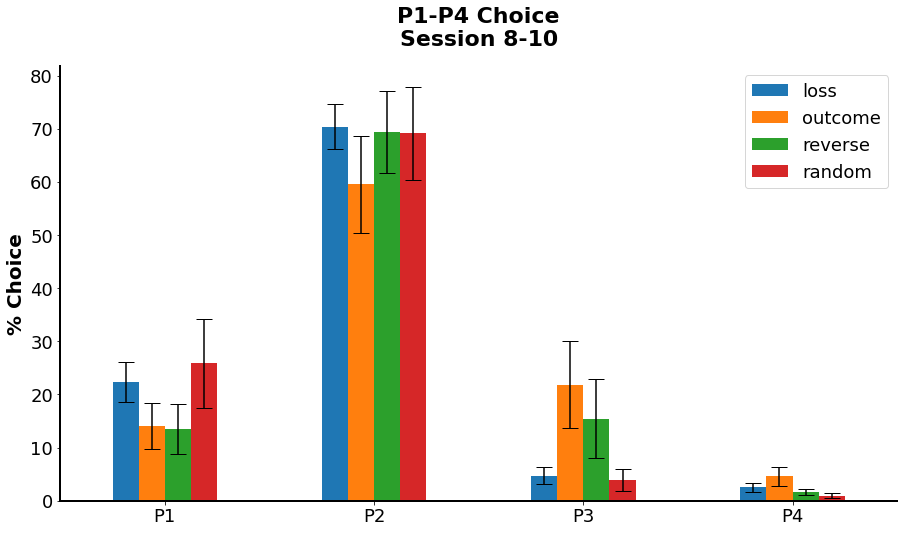

In [15]:
rgt.choice_bar_plot(8, endsess, mean_scores, SEM)

#To save figure:
# plt.savefig('BH07 Choice S29-30',facecolor = 'white')

## Line plot of other variables


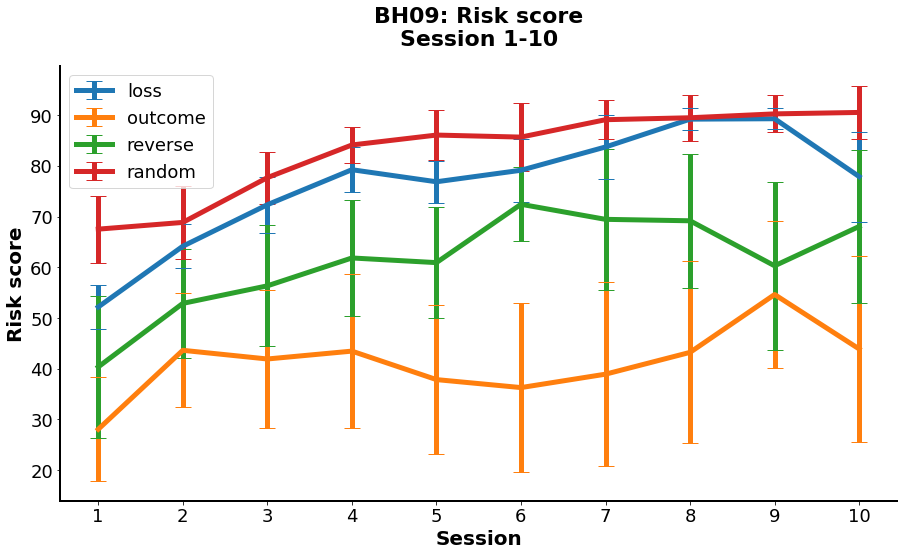

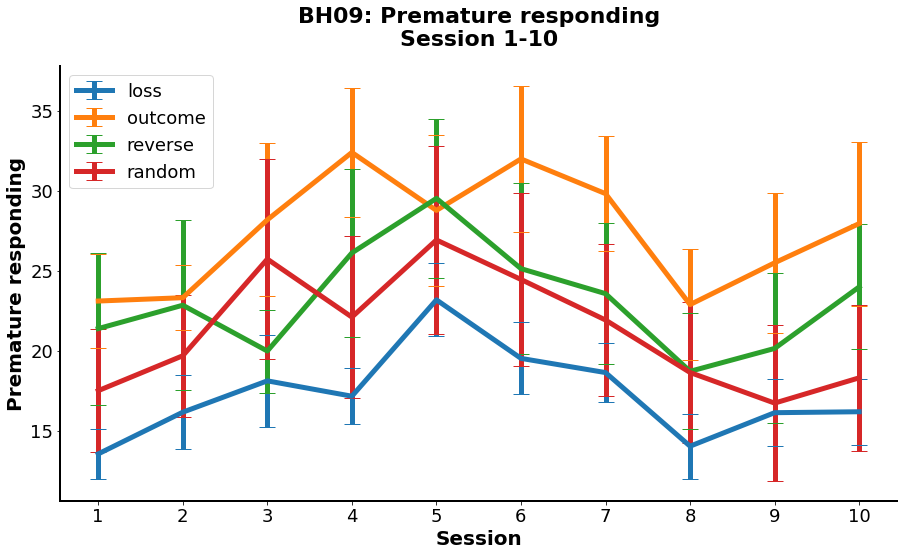

In [16]:
rgt.rgt_plot('risk', startsess, endsess, title, mean_scores, SEM, group_names = group_names, y_label = 'Risk score') 

rgt.rgt_plot('prem', startsess, endsess, title, mean_scores, SEM, group_names = group_names, y_label = 'Premature responding') 

## Bar plot of other variables



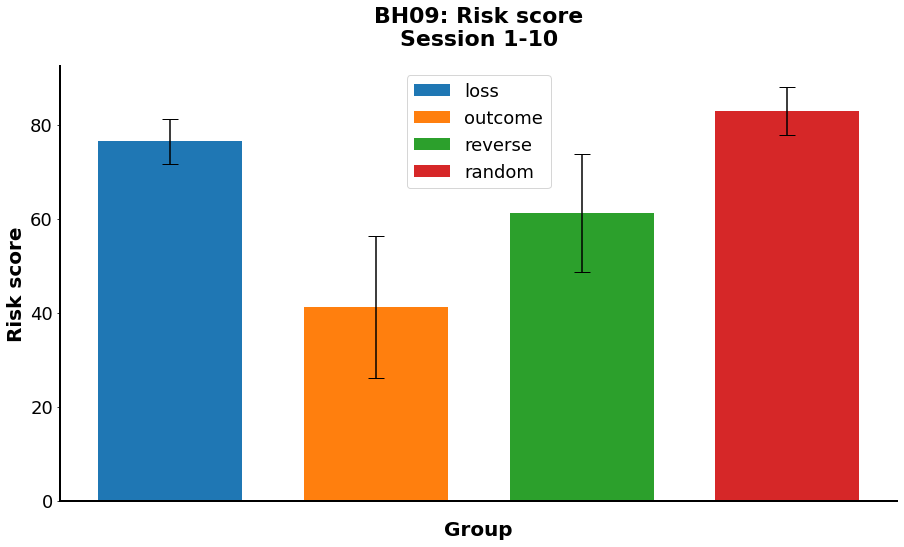

In [17]:
rgt.rgt_bar_plot('risk', startsess, endsess, title, mean_scores, SEM, group_names, y_label = 'Risk score')